<a href="https://colab.research.google.com/github/IshwarKapoor/IshwarKapoor/blob/main/Ch5_PPP_v2_Practical_data_science_in_python_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# project on Paycheck Protection Program (PPP) loan data
# sources: https://data.sba.gov/dataset/ppp-foia
# sources: https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/5-Chapter-5/data/PPP%20Data%20150k%20plus%20080820.zip

In [2]:
import pandas as pd
import requests

#github details are below
owner="PacktPublishing"
repo="Practical-Data-Science-with-Python"
path="5-Chapter-5/data/PPP Data 150k plus 080820.zip"

api_url=f'https://api.github.com/repos/{owner}/{repo}/contents/{path}'

response=requests.get(api_url)
file_content=response.json() # Parse the JSON response to get file metadata

zip_response=requests.get(file_content['download_url']) # Output <Response [200]> means all OK
zip_content=zip_response.content # output looks like Binary content

# lets import BytesIO
# also import zip file, since file contents are in zip file
# I would not download file, instead read to df directly

from io import BytesIO
import zipfile

with zipfile.ZipFile(BytesIO(zip_content), mode='r') as zip_ref:
  print("success and "f'file name is {zip_ref.filelist[0].filename}') # file name is PPP Data 150k plus 080820.csv
  # To open a file from *within* the zip archive, use zip_ref.open()
  # The argument should be the actual filename string, obtained from zip_ref.filelist[0].filename


  with zip_ref.open(zip_ref.filelist[0].filename, mode='r') as f:
    # If the content is text, you might need to decode it, e.g., f.read().decode('utf-8')
    # For this example, we'll just confirm it opened.
    print(f"\nSuccessfully opened '{zip_ref.filelist[0].filename}' from within the zip archive.")
    # You could now, for example, read its content:
    #first_line = f.readline().decode('utf-8').strip()
    #print(f"First line of the file: {first_line}")
    df= pd.read_csv(f)

df.head(10)

success and file name is PPP Data 150k plus 080820.csv

Successfully opened 'PPP Data 150k plus 080820.csv' from within the zip archive.


LoanRange                                      BusinessName  \
0  d $350,000-1 million                                      AERO BOX LLC   
1  d $350,000-1 million                           BOYER CHILDREN'S CLINIC   
2  d $350,000-1 million                          KIRTLEY CONSTRUCTION INC   
3  d $350,000-1 million                             PLEASANT PLACES, INC.   
4  d $350,000-1 million                             SUMTER COATINGS, INC.   
5    e $150,000-350,000                        CHURCH SQUARE PHARMACY INC   
6    e $150,000-350,000                  FERNANDINA BEACH HOTEL GROUP LLC   
7    e $150,000-350,000  FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC   
8    e $150,000-350,000                            HUDSON EXTRUSIONS INC.   
9    e $150,000-350,000            MIAMITOWN AUTO PARTS AND RECYCLING INC   

                 Address              City State      Zip  NAICSCode  \
0                    NaN               NaN   NaN      NaN   484210.0   
1       1850 BOYER AVE E           SEATTLE   NaN  98112.0        NaN   
2   1661 MARTIN RANCH RD    SAN BERNARDINO   NaN  92407.0   236115.0   
3    7684 Southrail Road  North Charleston   NaN  29420.0   561730.0   
4  2410 Highway 15 South            Sumter   NaN  29150.0   325510.0   
5                    NaN               NaN   NaN      NaN   424210.0   
6                    NaN               NaN   NaN      NaN   721110.0   
7      501 State Road 13       Saint Johns   NaN  32259.0   813110.0   
8                    NaN               NaN   NaN      NaN   326199.0   
9                    NaN               NaN   NaN      NaN   423140.0   

              BusinessType RaceEthnicity      Gender      Veteran NonProfit  \
0                      NaN    Unanswered  Unanswered   Unanswered       NaN   
1  Non-Profit Organization    Unanswered  Unanswered   Unanswered         Y   
2              Corporation    Unanswered  Unanswered   Unanswered       NaN   
3      Sole Proprietorship    Unanswered  Male Owned  Non-Veteran       NaN   
4              Corporation    Unanswered  Unanswered   Unanswered       NaN   
5              Corporation    Unanswered  Unanswered   Unanswered       NaN   
6                      NaN    Unanswered  Unanswered   Unanswered       NaN   
7  Non-Profit Organization    Unanswered  Unanswered   Unanswered         Y   
8                      NaN    Unanswered  Unanswered   Unanswered       NaN   
9              Corporation    Unanswered  Unanswered   Unanswered       NaN   

   JobsReported DateApproved                                 Lender     CD  
0           NaN   05/03/2020           The Huntington National Bank    NaN  
1          75.0   05/03/2020  Bank of America, National Association  WA-07  
2          21.0   05/03/2020  Bank of America, National Association  CA-31  
3          73.0   05/03/2020                           Synovus Bank  SC-01  
4          62.0   05/03/2020                           Synovus Bank  SC-05  
5           NaN   05/03/2020           The Huntington National Bank    NaN  
6           NaN   05/03/2020           The Huntington National Bank    NaN  
7          89.0   05/03/2020                           Synovus Bank  FL-04  
8           NaN   05/03/2020           The Huntington National Bank    NaN  
9           NaN   05/03/2020           The Huntington National Bank    NaN

In [3]:
df.info() # have a few missing data; 3 floats and rest objects
# lets convert dateapproved to standard format
# split the loan range to numeric range to do further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662515 entries, 0 to 662514
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanRange      662515 non-null  object 
 1   BusinessName   662510 non-null  object 
 2   Address        662498 non-null  object 
 3   City           662500 non-null  object 
 4   State          662499 non-null  object 
 5   Zip            662499 non-null  float64
 6   NAICSCode      655800 non-null  float64
 7   BusinessType   661110 non-null  object 
 8   RaceEthnicity  662515 non-null  object 
 9   Gender         662515 non-null  object 
 10  Veteran        662515 non-null  object 
 11  NonProfit      41993 non-null   object 
 12  JobsReported   622635 non-null  float64
 13  DateApproved   662515 non-null  object 
 14  Lender         662515 non-null  object 
 15  CD             662292 non-null  object 
dtypes: float64(3), object(13)
memory usage: 80.9+ MB


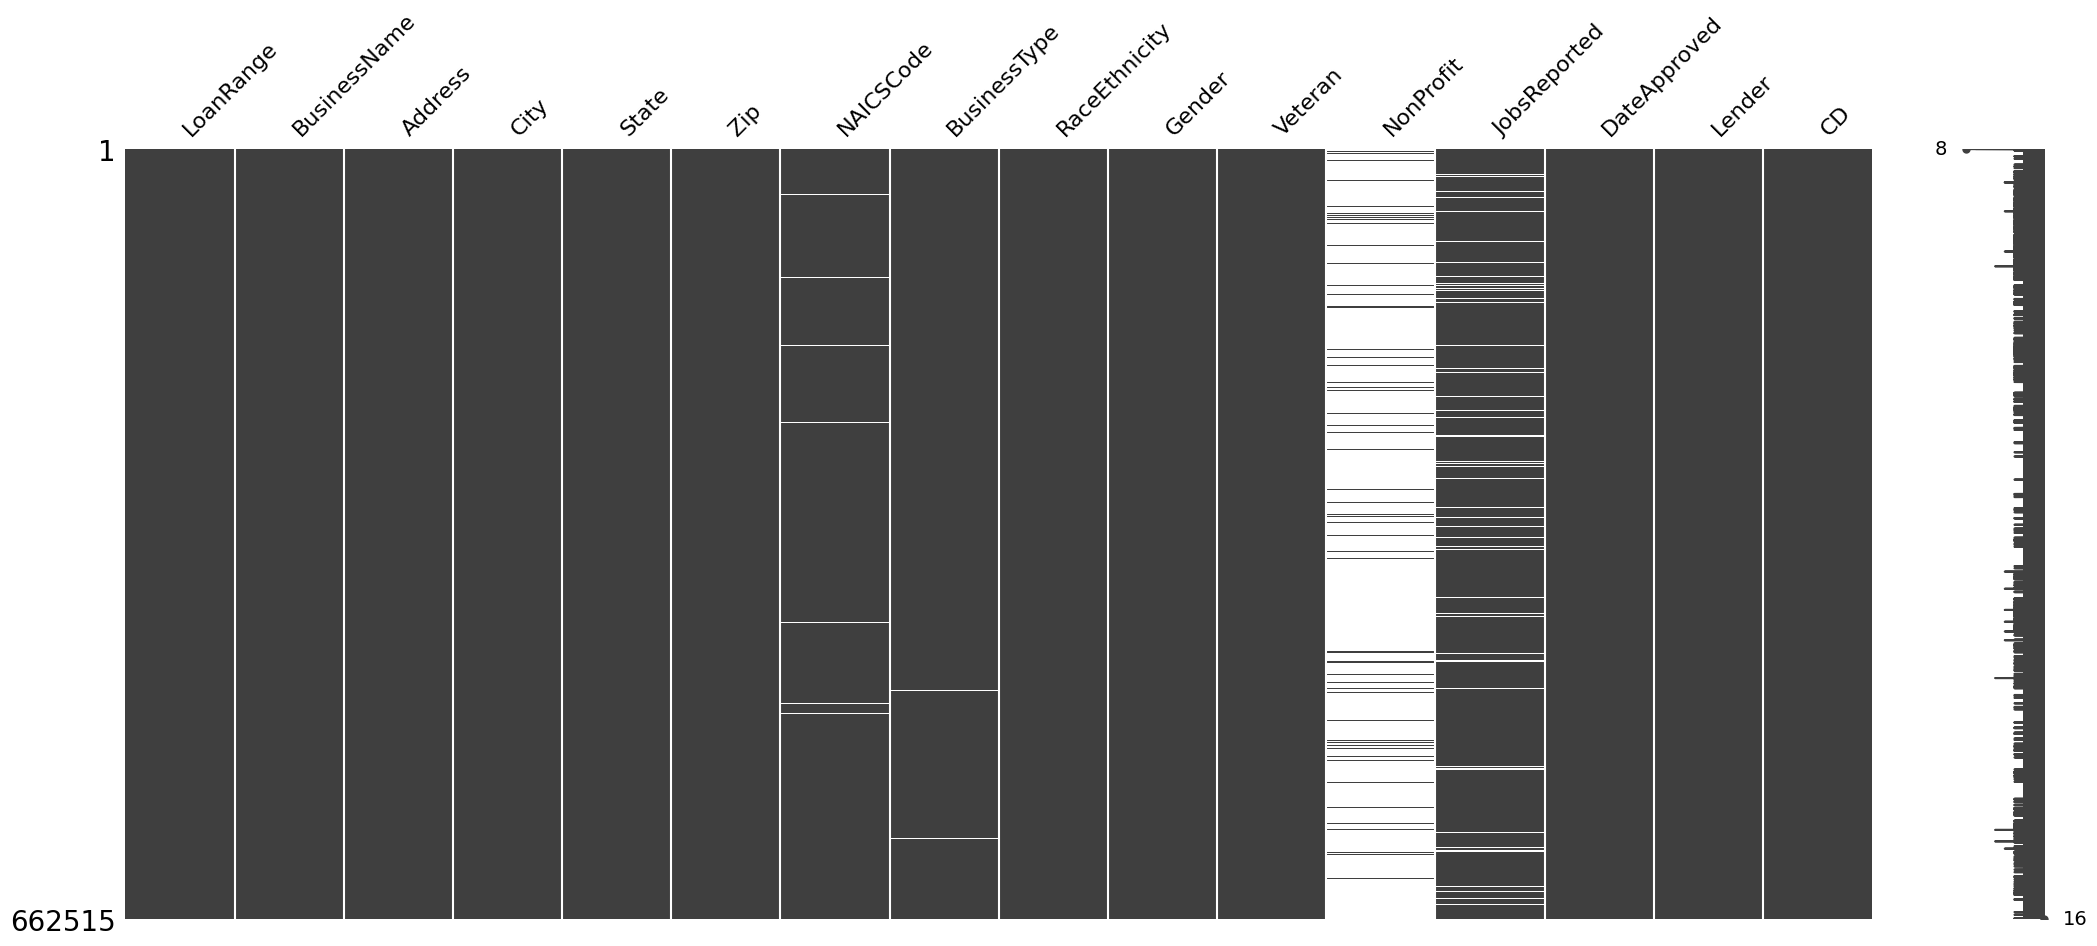

In [4]:
# graphical representation of missing values

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

msno.matrix(df)
plt.show()

In [5]:
# before we jump in to analysis, we can get rough idea about data form Profile Report package

!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


In [6]:
from ydata_profiling import ProfileReport

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:51<00:00,  3.21s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df[df.duplicated()] # duplicated rows, lets remove them

LoanRange                              BusinessName  \
86313   e $150,000-350,000                    JOHNS INCREDIBLE PIZZA   
86314   e $150,000-350,000                    JOHNS INCREDIBLE PIZZA   
326935  e $150,000-350,000  THE LEARNING TREE CHILD CARE CENTER, INC   
587563  e $150,000-350,000                       HARCO AVIATION, LLC   

                          Address                    City State      Zip  \
86313   22342 Avenida Empresa 220  Rancho Santa Margarita    CA  92688.0   
86314   22342 Avenida Empresa 220  Rancho Santa Margarita    CA  92688.0   
326935   23800 Industrial Park Dr              FARMINGTON    MI  48335.0   
587563          7930 AIRPORT BLVD                 HOUSTON    TX  77061.0   

        NAICSCode                     BusinessType RaceEthnicity      Gender  \
86313    722511.0  Limited  Liability Company(LLC)    Unanswered  Male Owned   
86314    722511.0  Limited  Liability Company(LLC)    Unanswered  Male Owned   
326935   624410.0                      Corporation    Unanswered  Unanswered   
587563   488119.0  Limited  Liability Company(LLC)    Unanswered  Unanswered   

            Veteran NonProfit  JobsReported DateApproved  \
86313   Non-Veteran       NaN           NaN   04/15/2020   
86314   Non-Veteran       NaN           NaN   04/15/2020   
326935   Unanswered       NaN           NaN   04/14/2020   
587563   Unanswered       NaN          25.0   04/09/2020   

                                     Lender     CD  
86313   Citizens Bank, National Association  CA-45  
86314   Citizens Bank, National Association  CA-45  
326935                    TCF National Bank  MI-11  
587563                           Frost Bank  TX-09

In [9]:
print(f'shape with duplicates {df.shape}')
df.drop_duplicates(inplace=True)
print(f'shape after removal of duplicates {df.shape}')

shape with duplicates (662515, 16)
shape after removal of duplicates (662511, 16)


In [10]:
df['LoanRange'].value_counts()

LoanRange
e $150,000-350,000      380632
d $350,000-1 million    199679
c $1-2 million           53218
b $2-5 million           24248
a $5-10 million           4734
Name: count, dtype: int64

In [11]:
# lets convert the object loan range to numeric

lower_band={'a $5-10 million': 5000000,
            'b $2-5 million': 2000000,
            'c $1-2 million': 1000000,
            'd $350,000-1 million': 350000,
            'e $150,000-350,000': 150000}

upper_band={'a $5-10 million': 10000000,
            'b $2-5 million': 5000000,
            'c $1-2 million': 2000000,
            'd $350,000-1 million': 1000000,
            'e $150,000-350,000': 350000}

In [12]:
df['LBLoanRange']=df['LoanRange'].replace(lower_band)
df['UBLoanRange']=df['LoanRange'].replace(upper_band)

#df.head(10)
print(df.info()) # note, LBLoanRange and UBLoanRange both are objects

#we need to convert them to num to do the math!

<class 'pandas.core.frame.DataFrame'>
Index: 662511 entries, 0 to 662514
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanRange      662511 non-null  object 
 1   BusinessName   662506 non-null  object 
 2   Address        662494 non-null  object 
 3   City           662496 non-null  object 
 4   State          662495 non-null  object 
 5   Zip            662495 non-null  float64
 6   NAICSCode      655796 non-null  float64
 7   BusinessType   661106 non-null  object 
 8   RaceEthnicity  662511 non-null  object 
 9   Gender         662511 non-null  object 
 10  Veteran        662511 non-null  object 
 11  NonProfit      41993 non-null   object 
 12  JobsReported   622634 non-null  float64
 13  DateApproved   662511 non-null  object 
 14  Lender         662511 non-null  object 
 15  CD             662288 non-null  object 
 16  LBLoanRange    662511 non-null  object 
 17  UBLoanRange    662511 non-null  ob

In [13]:
#we need to convert them to num to do the math!

df['LBLoanRange']=pd.to_numeric(df['LBLoanRange'])
df['UBLoanRange']=pd.to_numeric(df['UBLoanRange'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662511 entries, 0 to 662514
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanRange      662511 non-null  object 
 1   BusinessName   662506 non-null  object 
 2   Address        662494 non-null  object 
 3   City           662496 non-null  object 
 4   State          662495 non-null  object 
 5   Zip            662495 non-null  float64
 6   NAICSCode      655796 non-null  float64
 7   BusinessType   661106 non-null  object 
 8   RaceEthnicity  662511 non-null  object 
 9   Gender         662511 non-null  object 
 10  Veteran        662511 non-null  object 
 11  NonProfit      41993 non-null   object 
 12  JobsReported   622634 non-null  float64
 13  DateApproved   662511 non-null  object 
 14  Lender         662511 non-null  object 
 15  CD             662288 non-null  object 
 16  LBLoanRange    662511 non-null  int64  
 17  UBLoanRange    662511 non-null  in

In [14]:
# lets understand num columns in detail
df.describe()

Zip      NAICSCode   JobsReported   LBLoanRange   UBLoanRange
count  662495.000000  655796.000000  622634.000000  6.625110e+05  6.625110e+05
mean    51334.222598  504319.600777      50.325021  3.809242e+05  9.175941e+05
std     30763.293138  177773.605611      69.585873  5.568772e+05  1.216827e+06
min       256.000000  111110.000000       0.000000  1.500000e+05  3.500000e+05
25%     23606.000000  337110.000000      16.000000  1.500000e+05  3.500000e+05
50%     48726.000000  541110.000000      28.000000  1.500000e+05  3.500000e+05
75%     79701.000000  621320.000000      54.000000  3.500000e+05  1.000000e+06
max     99929.000000  999990.000000     500.000000  5.000000e+06  1.000000e+07

In [15]:
df[['Zip','NAICSCode','JobsReported','LBLoanRange','UBLoanRange']].isna().sum()
#lots of job reported are missing and a few NAICS code, however, we can do a quick correlation analysis
# to understand their num relationship

Zip                16
NAICSCode        6715
JobsReported    39877
LBLoanRange         0
UBLoanRange         0
dtype: int64

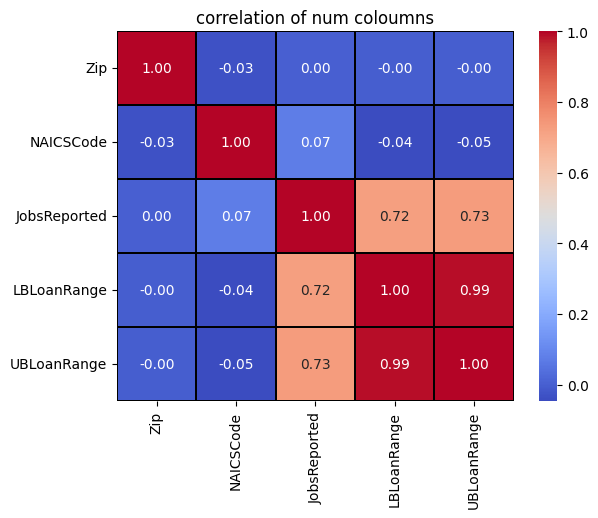

In [16]:
corre=df[['Zip','NAICSCode','JobsReported','LBLoanRange','UBLoanRange']].corr(method='pearson')
sns.heatmap(corre, cmap='coolwarm', annot=True, linewidths=0.3, linecolor='black', fmt='0.2f')
plt.title('correlation of num coloumns')
plt.show()
# not much to see tbh,
# only job reported is somewhat has correlation with loans taken

In [17]:
df['LoanRange'].value_counts().index

Index(['e $150,000-350,000', 'd $350,000-1 million', 'c $1-2 million',
       'b $2-5 million', 'a $5-10 million'],
      dtype='object', name='LoanRange')

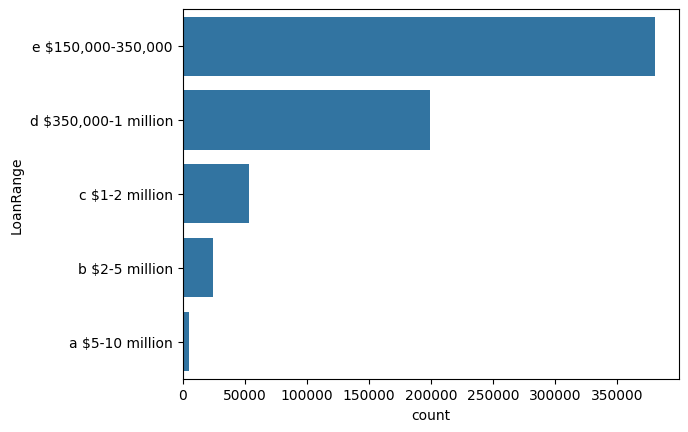

In [18]:
# let's plot some figures to explore the loan range and jobs reported

sns.countplot(data=df, y='LoanRange', order=df['LoanRange'].value_counts().index)
plt.show()

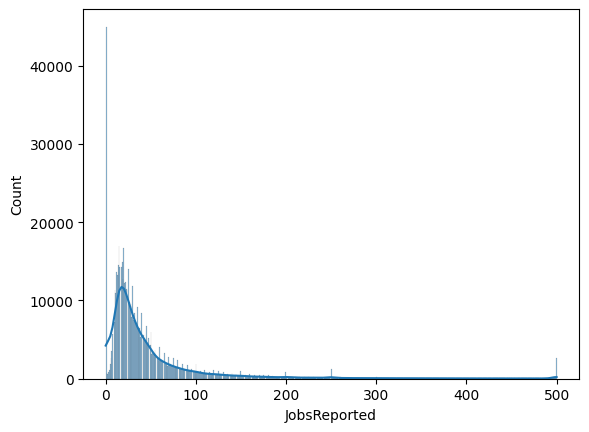

In [19]:
sns.histplot(data=df, x='JobsReported', kde=True)
plt.show()

In [20]:
df['JobsReported'].value_counts() # so many are 0 reported jobs

JobsReported
0.0      44978
15.0     16907
20.0     16648
18.0     14907
14.0     14499
         ...  
406.0       23
444.0       23
457.0       21
496.0       21
446.0       20
Name: count, Length: 501, dtype: int64

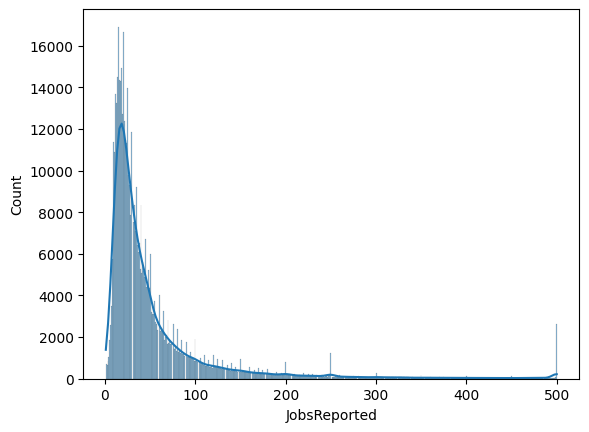

In [21]:
#lets re-plot, ommitting 0s in jobsreported

sns.histplot(data=df[df['JobsReported']!=0], x='JobsReported', kde=True)
plt.show()
# btw, nice explanation when to use count plot and histplot,
#https://www.kaggle.com/discussions/general/303648

In [22]:
grp=df[['LoanRange', 'JobsReported']].groupby('LoanRange').sum()

In [23]:
grp.reset_index(inplace=True)

In [24]:
grp.index

RangeIndex(start=0, stop=5, step=1)

In [25]:
grp.value_counts()

LoanRange             JobsReported
a $5-10 million       1661335.0       1
b $2-5 million        5150102.0       1
c $1-2 million        6001571.0       1
d $350,000-1 million  9956405.0       1
e $150,000-350,000    8564656.0       1
Name: count, dtype: int64

In [26]:
grp.sort_values('JobsReported', ascending=False)['LoanRange']

3    d $350,000-1 million
4      e $150,000-350,000
2          c $1-2 million
1          b $2-5 million
0         a $5-10 million
Name: LoanRange, dtype: object

In [27]:
grp

LoanRange  JobsReported
0       a $5-10 million     1661335.0
1        b $2-5 million     5150102.0
2        c $1-2 million     6001571.0
3  d $350,000-1 million     9956405.0
4    e $150,000-350,000     8564656.0

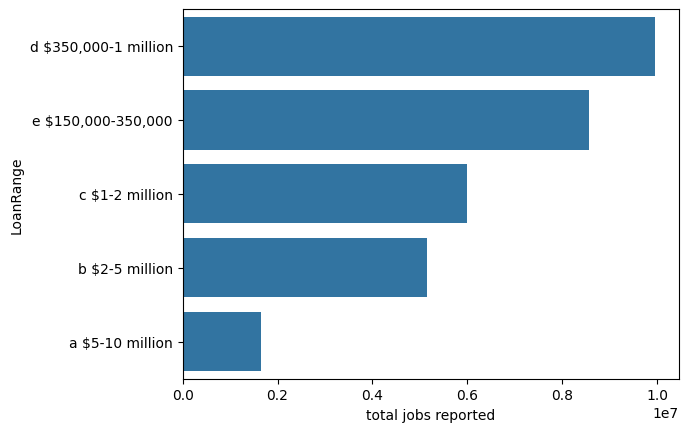

In [28]:
# lets plot loan range vs jobs reported
# we can see highest no. of jobs reported are for the 350,000-1million dollar

sns.barplot(data=grp, x='JobsReported', y='LoanRange', order=grp.sort_values('JobsReported', ascending=False)['LoanRange'])
plt.xlabel('total jobs reported')
#sns.barplot(data=grp, x='JobsReported', y='LoanRange')
plt.show()

In [29]:
df['LoanRange'].value_counts()

LoanRange
e $150,000-350,000      380632
d $350,000-1 million    199679
c $1-2 million           53218
b $2-5 million           24248
a $5-10 million           4734
Name: count, dtype: int64

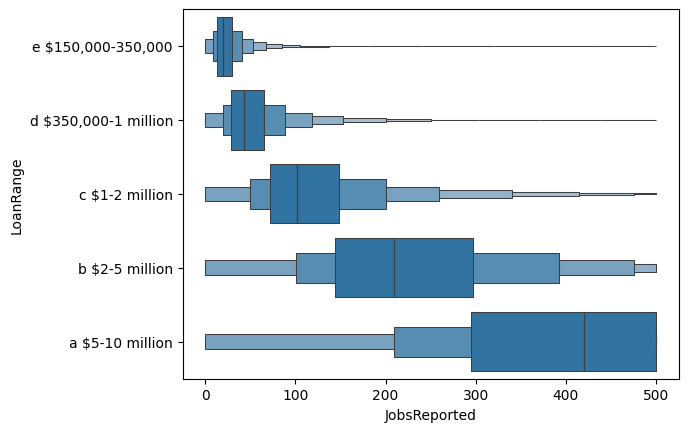

In [30]:
# small scale loan range has outliers
sns.boxenplot(data=df, x='JobsReported', y='LoanRange', order=df['LoanRange'].value_counts().index)
plt.show()

In [31]:
# it may not be accurate, but if we assume only LB Loan provided, we can find top 5 banks who lended the most LB value
LB_Lenders=df[['LBLoanRange', 'Lender']].groupby('Lender').sum()

In [32]:
LB_Lenders.sort_values('LBLoanRange', ascending=False)[:5]

LBLoanRange
Lender                                                  
JPMorgan Chase Bank, National Association    13750250000
Bank of America, National Association        10799450000
PNC Bank, National Association                7013900000
Truist Bank d/b/a Branch Banking & Trust Co   6633850000
KeyBank National Association                  4475850000

In [33]:
# it may not be accurate, but if we assume only UB Loan provided, we can find top 5 banks who lended the most UB value
UB_Lenders=df[['UBLoanRange', 'Lender']].groupby('Lender').sum()
UB_Lenders.sort_values('UBLoanRange', ascending=False)[:5]

UBLoanRange
Lender                                                  
JPMorgan Chase Bank, National Association    33141500000
Bank of America, National Association        25993000000
PNC Bank, National Association               16621350000
Truist Bank d/b/a Branch Banking & Trust Co  15933250000
KeyBank National Association                 10593550000

In [34]:
# this gives us idea which top 5 banks are lending the most of times THIS IS NOT EQUAL to that money also given by them is most
df['Lender'].value_counts()[:5]

Lender
JPMorgan Chase Bank, National Association      36923
Bank of America, National Association          29796
Truist Bank d/b/a Branch Banking & Trust Co    15764
PNC Bank, National Association                 14590
Wells Fargo Bank, National Association         12288
Name: count, dtype: int64

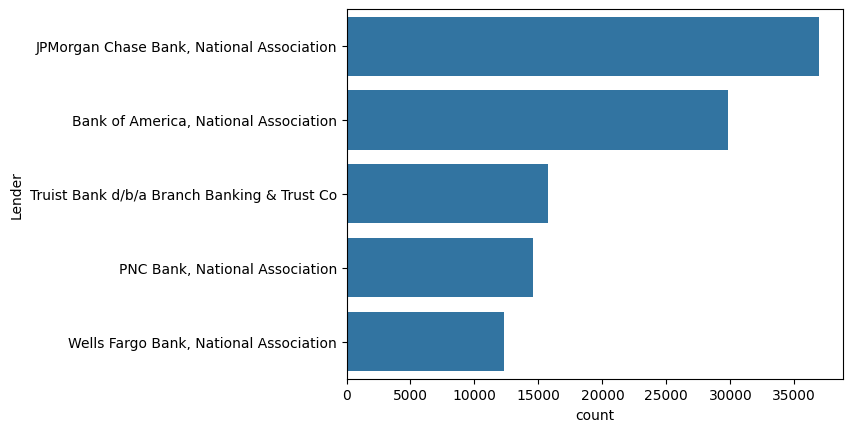

In [35]:
# this gives us idea which top 5 banks are lending the most of times THIS IS NOT EQUAL to that money also given by them is most
sns.countplot(data=df, y='Lender', order=df['Lender'].value_counts().index[:5])
plt.show()

In [36]:
# lets see which top 5 states got the most

df['State'].value_counts()[:5]

State
CA    87914
TX    52098
NY    47072
FL    42047
IL    27459
Name: count, dtype: int64

In [37]:
grp_state=df[['State','LBLoanRange','UBLoanRange']].groupby('State').sum()

In [38]:
grp_state.reset_index(inplace=True)

In [39]:
grp_state['LBLoanRange']=grp_state['LBLoanRange']/1000000000

In [40]:
grp_state['UBLoanRange']=grp_state['UBLoanRange']/1000000000

In [41]:
grp_state.sort_values('LBLoanRange', ascending=False)[:5]

State  LBLoanRange  UBLoanRange
5     CA     33.47820     80.63345
47    TX     19.58950     47.23735
37    NY     19.14020     45.84025
10    FL     14.00855     34.01580
16    IL     11.30390     27.03650

In [42]:
grp_state.sort_values('UBLoanRange', ascending=False)[:5]

State  LBLoanRange  UBLoanRange
5     CA     33.47820     80.63345
47    TX     19.58950     47.23735
37    NY     19.14020     45.84025
10    FL     14.00855     34.01580
16    IL     11.30390     27.03650

In [43]:
import plotly.express as px

px.choropleth(grp_state, locations='State', locationmode='USA-states', scope='usa', color='LBLoanRange')



In [44]:
px.choropleth(grp_state, locations='State', locationmode='USA-states', scope='usa', color='UBLoanRange')

In [45]:
grp_state

State  LBLoanRange  UBLoanRange
0     AK      0.63020      1.51490
1     AL      2.89080      6.96275
2     AR      1.46255      3.55255
3     AS      0.00420      0.01090
4     AZ      4.11675      9.97910
5     CA     33.47820     80.63345
6     CO      4.89765     11.81340
7     CT      3.22095      7.78840
8     DC      1.15995      2.80195
9     DE      0.76140      1.83655
10    FL     14.00855     34.01580
11    GA      6.69880     16.13690
12    GU      0.08570      0.21195
13    HI      1.16545      2.81180
14    IA      2.44205      5.87345
15    ID      1.15205      2.80090
16    IL     11.30390     27.03650
17    IN      4.75225     11.44810
18    KS      2.44110      5.88905
19    KY      2.52655      6.08085
20    LA      3.55540      8.52325
21    MA      7.14240     17.18720
22    MD      5.00845     12.08945
23    ME      1.03670      2.49515
24    MI      8.02480     19.22060
25    MN      5.68830     13.63635
26    MO      4.45595     10.73995
27    MP      0.01655      0.04055
28    MS      1.35975      3.29055
29    MT      0.74805      1.80975
30    NC      5.67665     13.74655
31    ND      0.84815      2.03520
32    NE      1.60985      3.86700
33    NH      1.20285      2.93735
34    NJ      8.52910     20.53520
35    NM      1.06250      2.56210
36    NV      1.97840      4.78655
37    NY     19.14020     45.84025
38    OH      9.40815     22.55530
39    OK      2.52540      6.13180
40    OR      3.39670      8.24110
41    PA     10.43620     25.08990
42    PR      0.69380      1.68100
43    RI      0.91245      2.20035
44    SC      2.57715      6.24050
45    SD      0.72635      1.76655
46    TN      4.16890     10.03800
47    TX     19.58950     47.23735
48    UT      2.50515      6.04615
49    VA      6.15305     14.82060
50    VI      0.04850      0.11635
51    VT      0.56480      1.37820
52    WA      6.11680     14.73060
53    WI      4.95505     11.92580
54    WV      0.84990      2.06965
55    WY      0.45210      1.09590

In [46]:
grp_state.sort_values('LBLoanRange', ascending=False)[:5]['State']

5     CA
47    TX
37    NY
10    FL
16    IL
Name: State, dtype: object

<Axes: xlabel='LBLoanRange', ylabel='State'>

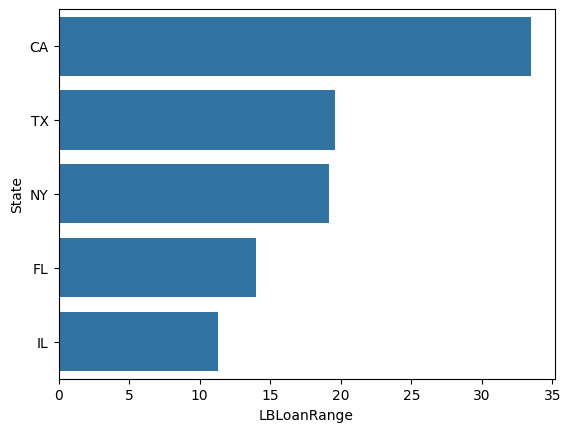

In [47]:
grp_state.sort_values('LBLoanRange', ascending=False)[:5]

sns.barplot(data=grp_state, x='LBLoanRange',y='State',
            order=grp_state.sort_values('LBLoanRange', ascending=False)[:5]['State']) # we plot the y-axis in order of state

In [48]:
df['DateApproved']=pd.to_datetime(df['DateApproved'])

In [65]:
#the total number of loan records that have been approved for each business type accumulating over time.
gb_db=df.groupby(['DateApproved', 'BusinessType']).count().groupby(level=-1).cumsum()
gb_db

LoanRange  BusinessName  \
DateApproved BusinessType                                                   
2020-04-03   Cooperative                                 51            51   
             Corporation                               4421          4421   
             Employee Stock Ownership Plan(ESOP)         30            30   
             Independent Contractors                      2             2   
             Limited  Liability Company(LLC)           2477          2477   
...                                                     ...           ...   
2020-08-08   Partnership                              12771         12771   
             Professional Association                  4257          4257   
             Self-Employed Individuals                  711           711   
             Sole Proprietorship                       8808          8807   
             Subchapter S Corporation                128787        128787   

                                                  Address    City   State  \
DateApproved BusinessType                                                   
2020-04-03   Cooperative                               51      51      51   
             Corporation                             4421    4421    4421   
             Employee Stock Ownership Plan(ESOP)       30      30      30   
             Independent Contractors                    2       2       2   
             Limited  Liability Company(LLC)         2477    2477    2477   
...                                                   ...     ...     ...   
2020-08-08   Partnership                            12771   12771   12771   
             Professional Association                4257    4257    4257   
             Self-Employed Individuals                711     711     711   
             Sole Proprietorship                     8807    8807    8807   
             Subchapter S Corporation              128786  128786  128787   

                                                     Zip  NAICSCode  \
DateApproved BusinessType                                             
2020-04-03   Cooperative                              51         51   
             Corporation                            4421       4420   
             Employee Stock Ownership Plan(ESOP)      30         30   
             Independent Contractors                   2          2   
             Limited  Liability Company(LLC)        2477       2477   
...                                                  ...        ...   
2020-08-08   Partnership                           12771      12649   
             Professional Association               4257       4216   
             Self-Employed Individuals               711        710   
             Sole Proprietorship                    8807       8658   
             Subchapter S Corporation             128786     127844   

                                                  RaceEthnicity  Gender  \
DateApproved BusinessType                                                 
2020-04-03   Cooperative                                     51      51   
             Corporation                                   4421    4421   
             Employee Stock Ownership Plan(ESOP)             30      30   
             Independent Contractors                          2       2   
             Limited  Liability Company(LLC)               2477    2477   
...                                                         ...     ...   
2020-08-08   Partnership                                  12771   12771   
             Professional Association                      4257    4257   
             Self-Employed Individuals                      711     711   
             Sole Proprietorship                           8808    8808   
             Subchapter S Corporation                    128787  128787   

                                                  Veteran  NonProfit  \
DateApproved BusinessType                                              
20

In [66]:
gb_db.reset_index(inplace=True)
gb_db

DateApproved                         BusinessType  LoanRange  \
0      2020-04-03                          Cooperative         51   
1      2020-04-03                          Corporation       4421   
2      2020-04-03  Employee Stock Ownership Plan(ESOP)         30   
3      2020-04-03              Independent Contractors          2   
4      2020-04-03      Limited  Liability Company(LLC)       2477   
...           ...                                  ...        ...   
1162   2020-08-08                          Partnership      12771   
1163   2020-08-08             Professional Association       4257   
1164   2020-08-08            Self-Employed Individuals        711   
1165   2020-08-08                  Sole Proprietorship       8808   
1166   2020-08-08             Subchapter S Corporation     128787   

      BusinessName  Address    City   State     Zip  NAICSCode  RaceEthnicity  \
0               51       51      51      51      51         51             51   
1             4421     4421    4421    4421    4421       4420           4421   
2               30       30      30      30      30         30             30   
3                2        2       2       2       2          2              2   
4             2477     2477    2477    2477    2477       2477           2477   
...            ...      ...     ...     ...     ...        ...            ...   
1162         12771    12771   12771   12771   12771      12649          12771   
1163          4257     4257    4257    4257    4257       4216           4257   
1164           711      711     711     711     711        710            711   
1165          8807     8807    8807    8807    8807       8658           8808   
1166        128787   128786  128786  128787  128786     127844         128787   

      Gender  Veteran  NonProfit  JobsReported  Lender      CD  LBLoanRange  \
0         51       51          0            51      51      51           51   
1       4421     4421          0          4421    4421    4421         4421   
2         30       30          0            30      30      30           30   
3          2        2          0             2       2       2            2   
4       2477     2477          0          2477    2477    2477         2477   
...      ...      ...        ...           ...     ...     ...          ...   
1162   12771    12771          0         11941   12771   12769        12771   
1163    4257     4257          0          4061    4257    4257         4257   
1164     711      711          0           703     711     710          711   
1165    8808     8808          0          8324    8808    8807         8808   
1166  128787   128787          0        120735  128787  128715       128787   

      UBLoanRange  
0              51  
1            4421  
2              30  
3               2  
4            2477  
...           ...  
1162        12771  
1163         4257  
1164          711  
1165         8808  
1166       128787  

[1167 rows x 18 columns]

In [72]:
gb_db['DateApproved'].value_counts()

DateApproved
2020-04-13    17
2020-04-09    17
2020-04-29    16
2020-04-28    16
2020-04-08    16
              ..
2020-05-31     4
2020-07-04     4
2020-07-11     4
2020-07-18     4
2020-07-12     3
Name: count, Length: 114, dtype: int64

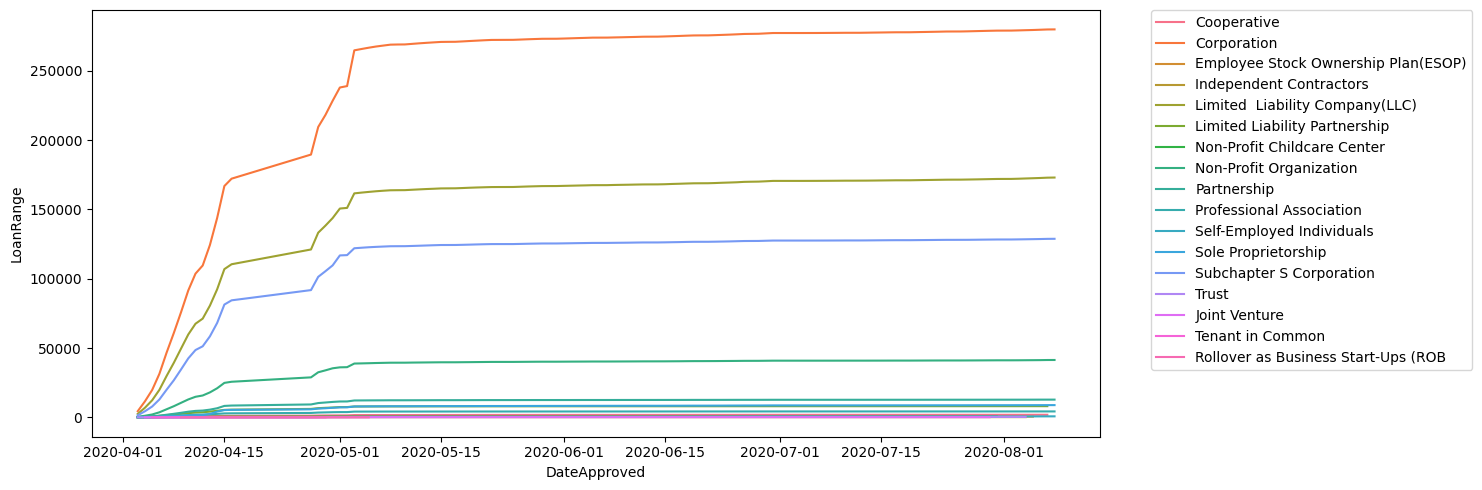

In [75]:
# the total number of loan records that have been approved for each business type accumulating over time
# cooperative loans grow over the time
# after May 2020, most of them became asymptomatic in behaviour
plt.figure(figsize=(15,5))
sns.lineplot(data=gb_db, x='DateApproved', y='LoanRange', hue='BusinessType')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [80]:
df['BusinessType'].value_counts(ascending=False).index

Index(['Corporation', 'Limited  Liability Company(LLC)',
       'Subchapter S Corporation', 'Non-Profit Organization', 'Partnership',
       'Sole Proprietorship', 'Limited Liability Partnership',
       'Professional Association', 'Cooperative', 'Self-Employed Individuals',
       'Non-Profit Childcare Center', 'Employee Stock Ownership Plan(ESOP)',
       'Trust', 'Independent Contractors', 'Joint Venture', 'Tenant in Common',
       'Rollover as Business Start-Ups (ROB'],
      dtype='object', name='BusinessType')

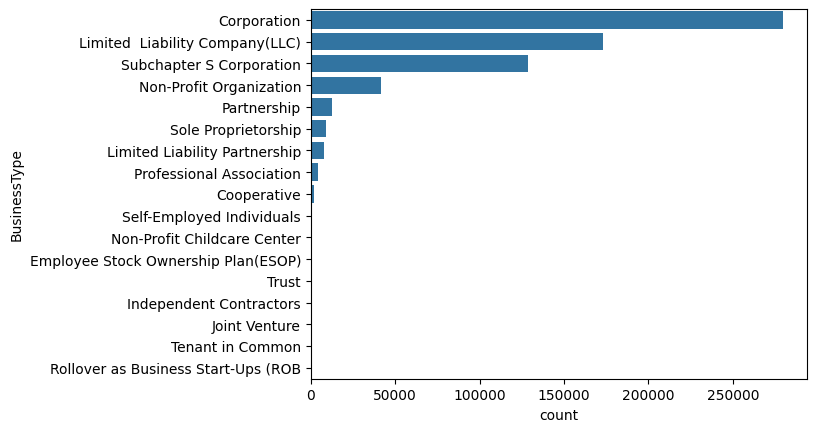

In [82]:
sns.countplot(data=df, y='BusinessType', order=df['BusinessType'].value_counts(ascending=False).index)
plt.show()

In [130]:
gb_db['BusinessType'].value_counts()[:5]

BusinessType
Corporation                        114
Limited  Liability Company(LLC)    113
Subchapter S Corporation           112
Non-Profit Organization            109
Sole Proprietorship                106
Name: count, dtype: int64

In [138]:
t=gb_db['BusinessType'].value_counts()[:5].to_frame()


In [159]:
t

BusinessType  count
0                      Corporation    114
1  Limited  Liability Company(LLC)    113
2         Subchapter S Corporation    112
3          Non-Profit Organization    109
4              Sole Proprietorship    106

In [160]:
t.reset_index(inplace=True)

In [161]:
t['BusinessType']

0                        Corporation
1    Limited  Liability Company(LLC)
2           Subchapter S Corporation
3            Non-Profit Organization
4                Sole Proprietorship
Name: BusinessType, dtype: object

In [162]:
gb_db['BusinessType'].isin(t['BusinessType'])

0       False
1        True
2       False
3       False
4        True
        ...  
1162    False
1163    False
1164    False
1165     True
1166     True
Name: BusinessType, Length: 1167, dtype: bool

In [163]:
gb_db[gb_db['BusinessType'].isin(t['BusinessType'])]

DateApproved                     BusinessType  LoanRange  BusinessName  \
1      2020-04-03                      Corporation       4421          4421   
4      2020-04-03  Limited  Liability Company(LLC)       2477          2477   
7      2020-04-03          Non-Profit Organization        390           390   
11     2020-04-03              Sole Proprietorship         45            45   
12     2020-04-03         Subchapter S Corporation       1492          1492   
...           ...                              ...        ...           ...   
1159   2020-08-08                      Corporation     279861        279860   
1160   2020-08-08  Limited  Liability Company(LLC)     172987        172986   
1161   2020-08-08          Non-Profit Organization      41364         41362   
1165   2020-08-08              Sole Proprietorship       8808          8807   
1166   2020-08-08         Subchapter S Corporation     128787        128787   

      Address    City   State     Zip  NAICSCode  RaceEthnicity  Gender  \
1        4421    4421    4421    4421       4420           4421    4421   
4        2477    2477    2477    2477       2477           2477    2477   
7         390     390     390     390        390            390     390   
11         45      45      45      45         45             45      45   
12       1492    1492    1492    1492       1492           1492    1492   
...       ...     ...     ...     ...        ...            ...     ...   
1159   279858  279858  279857  279858     277127         279861  279861   
1160   172984  172986  172987  172986     170869         172987  172987   
1161    41364   41364   41362   41363      40992          41364   41364   
1165     8807    8807    8807    8807       8658           8808    8808   
1166   128786  128786  128787  128786     127844         128787  128787   

      Veteran  NonProfit  JobsReported  Lender      CD  LBLoanRange  \
1        4421          0          4421    4421    4421         4421   
4        2477          0          2477    2477    2477         2477   
7         390        390           390     390     390          390   
11         45          0            45      45      45           45   
12       1492          0          1492    1492    1492         1492   
...       ...        ...           ...     ...     ...          ...   
1159   279861          0        262570  279861  279840       279861   
1160   172987          0        163288  172987  172920       172987   
1161    41364      41364         38663   41364   41351        41364   
1165     8808          0          8324    8808    8807         8808   
1166   128787          0        120735  128787  128715       128787   

      UBLoanRange  
1            4421  
4            2477  
7             390  
11             45  
12           1492  
...           ...  
1159       279861  
1160       172987  
1161        41364  
1165         8808  
1166       128787  

[554 rows x 18 columns]

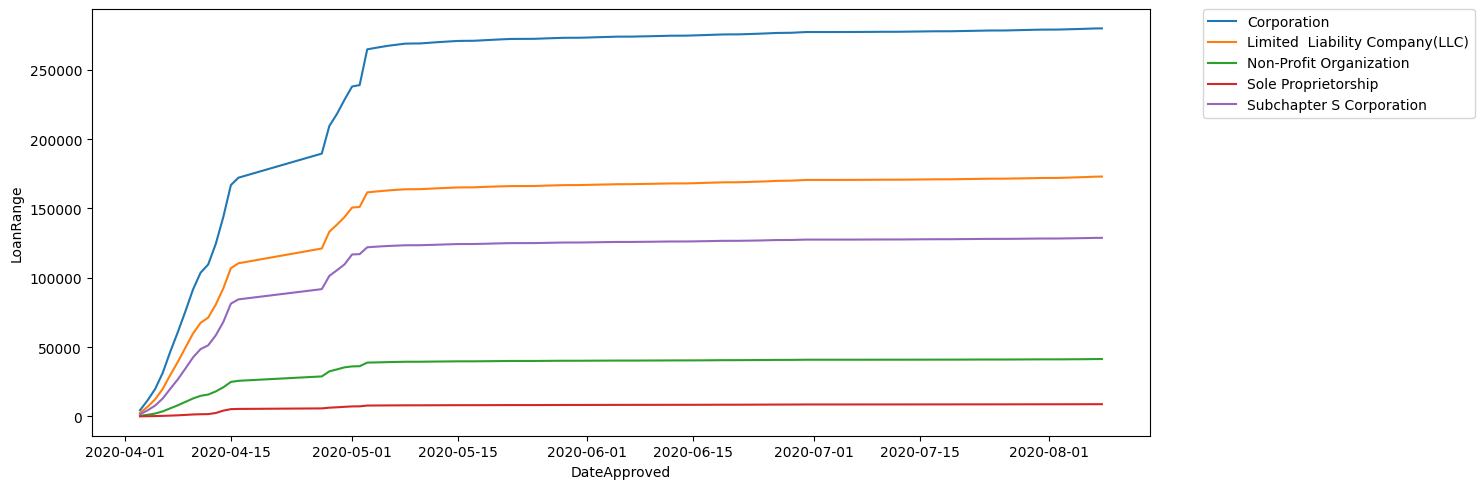

In [145]:
# lets plot top 5 businesses to approve loans
# the total number of loan records that have been approved for each business type accumulating over time
# cooperative loans grow over the time
# after May 2020, most of them became asymptomatic in behaviour

plt.figure(figsize=(15,5))
sns.lineplot(data=gb_db[gb_db['BusinessType'].isin(t['BusinessType'])], x='DateApproved', y='LoanRange',hue='BusinessType')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


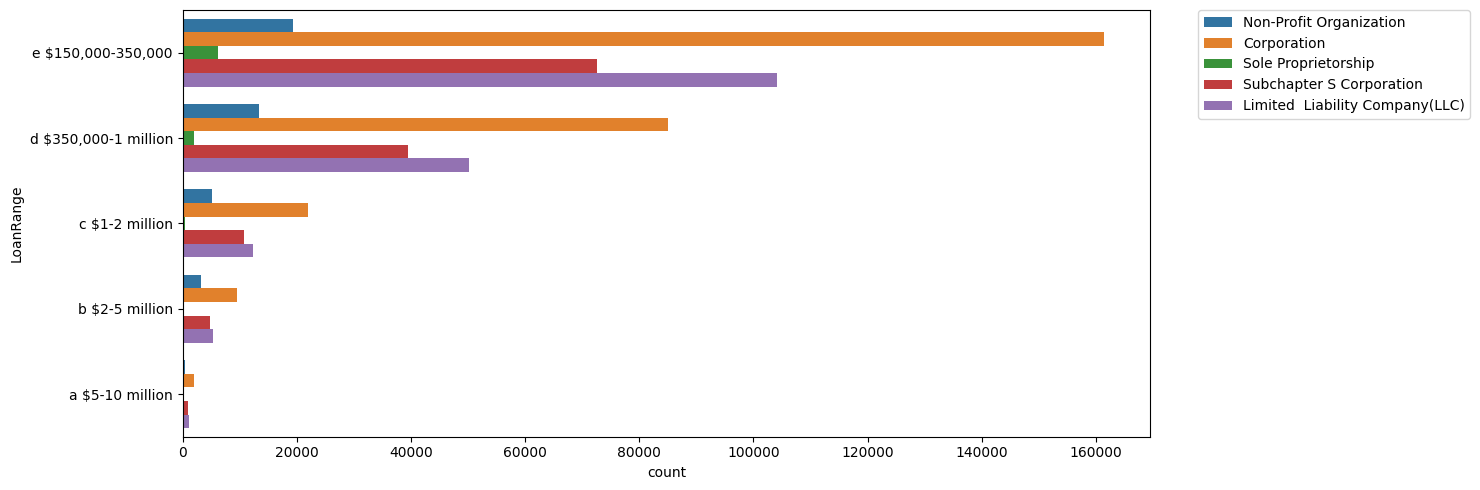

In [166]:
#Corporation has given loans for most categories
# mostly low range loans but also higher more than 5 million dollars

plt.figure(figsize=(15,5))
sns.countplot(data=df[df['BusinessType'].isin(t['BusinessType'])], y='LoanRange',hue='BusinessType', order=df['LoanRange'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [150]:
gb_db['BusinessType'].value_counts().index[:5]

Index(['Corporation', 'Limited  Liability Company(LLC)',
       'Subchapter S Corporation', 'Non-Profit Organization',
       'Sole Proprietorship'],
      dtype='object', name='BusinessType')

In [157]:
for a in gb_db['BusinessType'].value_counts().index[:5]:
  print(f'{gb_db['BusinessType']==a}')

0       False
1        True
2       False
3       False
4       False
        ...  
1162    False
1163    False
1164    False
1165    False
1166    False
Name: BusinessType, Length: 1167, dtype: bool
0       False
1       False
2       False
3       False
4        True
        ...  
1162    False
1163    False
1164    False
1165    False
1166    False
Name: BusinessType, Length: 1167, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1162    False
1163    False
1164    False
1165    False
1166     True
Name: BusinessType, Length: 1167, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1162    False
1163    False
1164    False
1165    False
1166    False
Name: BusinessType, Length: 1167, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1162    False
1163    False
1164    False
1165     True
1166    False
Name: BusinessType, Length: 1167, dtype: bool
